In [2]:
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d


import pandas as pd

In [3]:
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

In [4]:
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop', 
 ]

In [5]:
data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [6]:
numberDataset = data._get_numeric_data()

In [7]:
dataMat = numberDataset.drop(['state','fold'],axis=1).values
dataMat

array([[0.19, 0.33, 0.02, ..., 0.2 , 0.32, 0.2 ],
       [0.  , 0.16, 0.12, ..., 0.45, 0.  , 0.67],
       [0.  , 0.42, 0.49, ..., 0.02, 0.  , 0.43],
       ...,
       [0.16, 0.37, 0.25, ..., 0.18, 0.91, 0.23],
       [0.08, 0.51, 0.06, ..., 0.33, 0.22, 0.19],
       [0.2 , 0.78, 0.14, ..., 0.05, 1.  , 0.48]])

In [8]:
datamean = np.mean(dataMat,axis=0)

In [9]:
dataMatM = dataMat - datamean

In [10]:
print(np.mean(dataMatM[:,0]))

2.4498401746994428e-18


In [11]:
covMat = dataMatM.T @ dataMatM  # data matrix times its transpose
covMat /= (dataMatM.shape[0]-1) # divide by N-1

In [12]:
clim = np.max(np.abs(covMat)) * .2

Text(0.5, 1.0, 'Data covariance matrix')

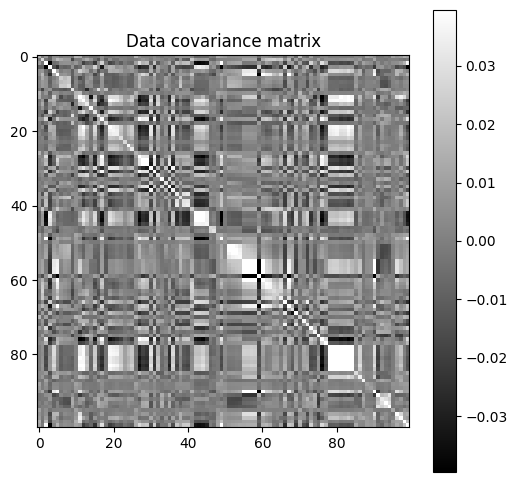

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(covMat,vmin=-clim,vmax=clim,cmap='gray')
plt.colorbar()
plt.title('Data covariance matrix')

In [14]:
variances = np.diag(covMat) # variances are the diagonals of a covariance
standard_devs = np.sqrt( variances )
S = np.diag( 1/standard_devs )

In [15]:
corrMat = S @ covMat @ S

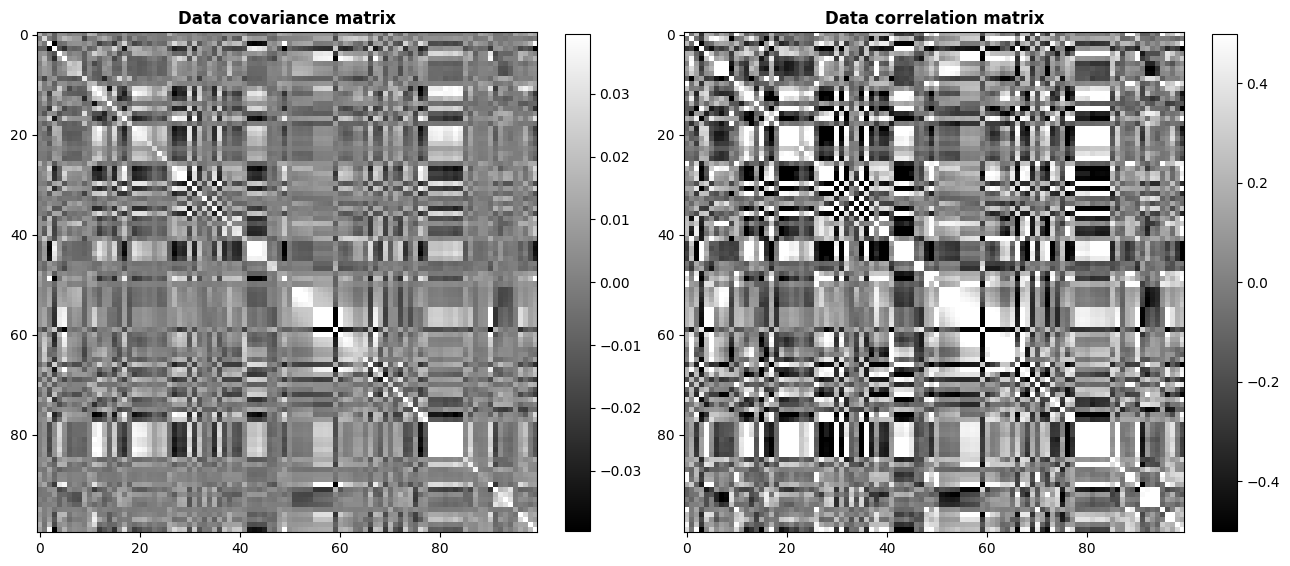

In [16]:
fig,axs = plt.subplots(1,2,figsize=(13,6))
h1 = axs[0].imshow(covMat,vmin=-clim,vmax=clim,cmap='gray')
axs[0].set_title('Data covariance matrix',fontweight='bold')

h2 = axs[1].imshow(corrMat,vmin=-.5,vmax=.5,cmap='gray')
axs[1].set_title('Data correlation matrix',fontweight='bold')

fig.colorbar(h1,ax=axs[0],fraction=.045)
fig.colorbar(h2,ax=axs[1],fraction=.045)

plt.tight_layout()